In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#Importing the datasets of different formats
stockFile1=pd.read_csv('Datasets/Stock_File_1.csv')
stockFile2=pd.read_table('Datasets/Stock_File_2.txt',sep=',')

In [6]:
#Checking the basic info of both datasets
stockFile1.info()
stockFile2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    165 non-null    object 
 1   Open    161 non-null    float64
 2   High    158 non-null    float64
 3   Low     159 non-null    float64
 4   Close   158 non-null    float64
 5   Volume  165 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    204 non-null    object 
 1   Open    201 non-null    float64
 2   High    195 non-null    float64
 3   Low     197 non-null    float64
 4   Close   197 non-null    float64
 5   Volume  204 non-null    object 
dtypes: float64(4), object(2)
memory usage: 9.7+ KB


In [7]:
#Combining the datasets to form a single dataset
stockFile=pd.concat([stockFile1,stockFile2],ignore_index=True)
stf=stockFile.copy()

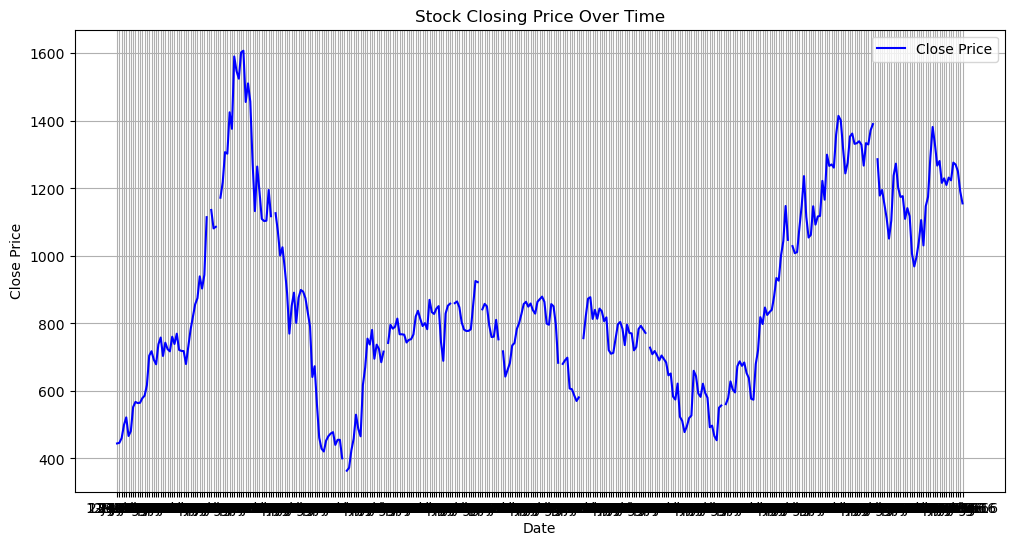

In [ ]:
#Visualizing the dirty data
plt.figure(figsize=(12, 6))
plt.plot(stockFile['Date'], stockFile['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
#Checking for any malformed dates present using lambda function
malformed_count=stockFile['Date'].apply(lambda x: pd.to_datetime(x,format='%d-%b-%y',errors='coerce')).isna().sum()
print(malformed_count)

0


In [6]:
#No malformed dates present, converting it into proper format
stockFile['Date']=pd.to_datetime(stockFile['Date'], format='%d-%b-%y')

In [7]:
#Sorting the dataset in chronological order based on dates
stockFile=stockFile.sort_values(by='Date',ascending=True)

In [8]:
#Checking for any null values in 'Volume'
stockFile['Volume'].isna().sum() #No null values present

0

In [9]:
#Check for the unique values in 'Volume' before converting it into int to know if all the values are int or not
np.unique(stockFile['Volume'],return_counts=True)

(array(['10100', '10200', '10300', '10400', '10500', '10600', '10700',
        '107800', '108900', '11000', '110400', '110800', '11100', '11300',
        '113300', '11400', '114500', '11500', '116800', '11700', '11800',
        '11900', '12000', '12100', '121000', '12200', '122300', '12300',
        '12400', '12500', '125200', '125500', '12600', '126900', '12700',
        '12800', '12900', '13000', '130800', '131900', '13300', '133300',
        '13400', '13500', '135000', '135800', '13600', '13700', '13800',
        '138500', '139400', '1400', '14100', '14300', '144600', '14600',
        '14800', '14900', '151200', '152500', '15600', '15700', '16100',
        '16400', '16500', '165200', '165800', '16600', '16700', '17100',
        '17200', '17400', '17600', '17700', '17900', '18000', '18100',
        '18400', '18700', '18900', '19000', '19200', '19400', '19600',
        '19700', '19800', '19900', '199500', '20000', '203500', '20600',
        '20800', '21200', '21700', '21900', '219500'

In [10]:
#Replacing all the strings 'zero' with 0 and converting the 'Volume' into int datatype and rechecking for the unique values
stockFile['Volume']=stockFile.Volume.replace("zero",0)
stockFile['Volume']=stockFile['Volume'].astype(int)
np.unique(stockFile['Volume'],return_counts=True)

(array([     0,   1400,   2600,   2800,   2900,   3000,   3100,   3200,
          3300,   3400,   3500,   3700,   3900,   4000,   4200,   4300,
          4400,   4500,   4600,   4700,   4800,   4900,   5000,   5100,
          5200,   5300,   5400,   5500,   5700,   5800,   5900,   6000,
          6100,   6200,   6600,   6700,   6800,   7000,   7200,   7300,
          7400,   7600,   7700,   7800,   8000,   8200,   8400,   8500,
          8700,   8800,   8900,   9000,   9100,   9400,   9500,   9700,
          9800,  10100,  10200,  10300,  10400,  10500,  10600,  10700,
         11000,  11100,  11300,  11400,  11500,  11700,  11800,  11900,
         12000,  12100,  12200,  12300,  12400,  12500,  12600,  12700,
         12800,  12900,  13000,  13300,  13400,  13500,  13600,  13700,
         13800,  14100,  14300,  14600,  14800,  14900,  15600,  15700,
         16100,  16400,  16500,  16600,  16700,  17100,  17200,  17400,
         17600,  17700,  17900,  18000,  18100,  18400,  18700, 

In [11]:
#Checking for rest float variables
np.unique(stockFile['Open'],return_counts=True)
np.unique(stockFile['Close'],return_counts=True)
np.unique(stockFile['High'],return_counts=True)
np.unique(stockFile['Low'],return_counts=True)

(array([ 354.  ,  365.2 ,  366.  ,  414.05,  419.  ,  421.1 ,  430.  ,
         440.  ,  442.  ,  447.6 ,  448.45,  449.2 ,  450.9 ,  451.1 ,
         453.4 ,  455.  ,  456.  ,  458.2 ,  458.75,  461.25,  465.  ,
         470.  ,  475.  ,  475.8 ,  480.05,  486.25,  487.35,  489.  ,
         491.35,  493.  ,  517.  ,  519.55,  520.5 ,  522.15,  525.  ,
         538.35,  541.  ,  546.  ,  546.5 ,  547.95,  550.15,  552.85,
         556.  ,  556.05,  560.  ,  562.02,  570.  ,  572.  ,  573.  ,
         574.67,  580.  ,  581.2 ,  585.  ,  588.  ,  591.5 ,  593.  ,
         597.4 ,  601.1 ,  601.4 ,  604.3 ,  611.  ,  613.  ,  615.  ,
         621.05,  626.35,  632.05,  635.  ,  637.  ,  638.  ,  642.8 ,
         646.05,  649.1 ,  650.  ,  657.05,  664.  ,  666.2 ,  669.9 ,
         670.  ,  674.14,  675.  ,  675.05,  675.1 ,  676.  ,  676.2 ,
         678.5 ,  680.  ,  681.  ,  682.9 ,  683.  ,  685.  ,  687.  ,
         690.  ,  691.  ,  692.6 ,  696.  ,  701.01,  702.  ,  703.1 ,
      

In [12]:
#Checking for the null indexes and concluding if to drop or impute the missing value rows
null_index=stockFile[stockFile['High'].isna()].index
print(null_index)

Index([31, 73, 83, 92, 121, 155, 156, 215, 228, 240, 246, 298, 309, 342, 353,
       366],
      dtype='int64')


In [13]:
#Imputing the null values using logical approach
stockFile['Open']=stockFile['Open'].fillna((stockFile['High']+stockFile['Low'])/2)
stockFile['Close']=stockFile['Close'].fillna((stockFile['High']+stockFile['Low'])/2)
stockFile['High']=stockFile['High'].fillna(stockFile[['Open','Close','Low']].max(axis=1))                                         
stockFile['Low']=stockFile['Low'].fillna(stockFile[['Open','Close','High']].min(axis=1)) 

In [14]:
#Checking for any invalid rows using logic
r1=(stockFile['Low']<=stockFile['Open']) & (stockFile['High']>=stockFile['Open'])
r2=(stockFile['Low']<=stockFile['Close']) & (stockFile['High']>=stockFile['Close'])
validPrices=r1 & r2
print("Invalid rows are ",len(stockFile[~validPrices]))

Invalid rows are  25


In [15]:
#Imputing invalid rows with High price values where it is logical fallicacy
invalidRows=stockFile[~validPrices]
invalidRows['High']=invalidRows.apply(lambda x: max(x['Low'],x['Open'],x['Close']),axis=1)
stockFile.update(invalidRows)

/var/folders/4n/qtwztn957tq_p6qm84yxsr740000gn/T/ipykernel_15813/625649208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invalidRows['High']=invalidRows.apply(lambda x: max(x['Low'],x['Open'],x['Close']),axis=1)


In [16]:
#Checking again for any invalid rows
r1=(stockFile['Low']<=stockFile['Open']) & (stockFile['High']>=stockFile['Open'])
r2=(stockFile['Low']<=stockFile['Close']) & (stockFile['High']>=stockFile['Close'])
validPrices=r1 & r2
print("Invalid rows are ",len(stockFile[~validPrices]))

Invalid rows are  2


In [17]:
#Imputing invalid rows with Low price values where it is logical fallicacy
invalidRows=stockFile[~validPrices]
invalidRows['Low']=invalidRows.apply(lambda x: min(x['Open'],x['Close']),axis=1)
stockFile.update(invalidRows)

/var/folders/4n/qtwztn957tq_p6qm84yxsr740000gn/T/ipykernel_15813/726592381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invalidRows['Low']=invalidRows.apply(lambda x: min(x['Open'],x['Close']),axis=1)


In [18]:
#Final Check for any invalid rows
r1=(stockFile['Low']<=stockFile['Open']) & (stockFile['High']>=stockFile['Open'])
r2=(stockFile['Low']<=stockFile['Close']) & (stockFile['High']>=stockFile['Close'])
validPrices=r1 & r2
print("Invalid rows are ",len(stockFile[~validPrices]))
invalidRows=stockFile[~validPrices]

Invalid rows are  0


In [19]:
#Checking for any duplicates
len(np.unique(stockFile['Date']))

369

In [20]:
#Checking for no trading days
noTrade=stockFile[stockFile['Volume']==0]

In [21]:
#Dropping the non trading days rows and resetting index
stockFile=stockFile.drop(noTrade.index)
stockFile.reset_index(drop=True,inplace=True)

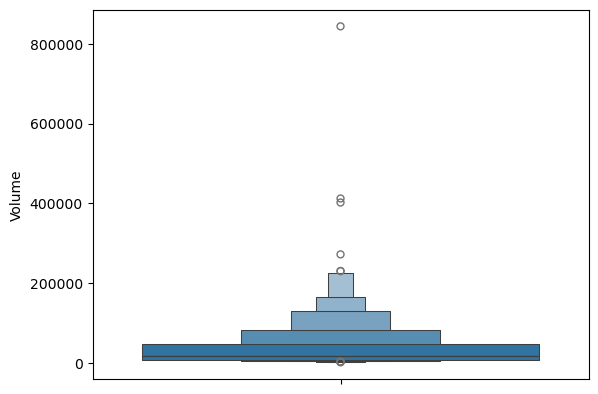

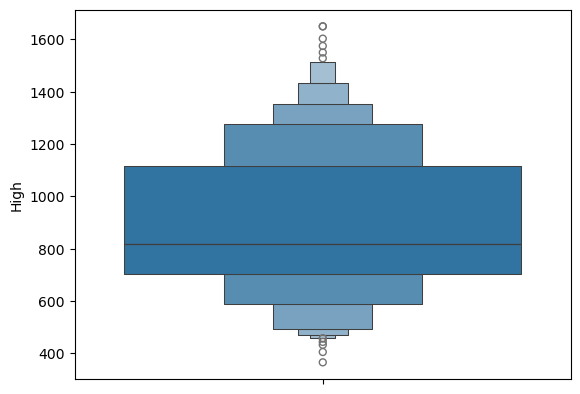

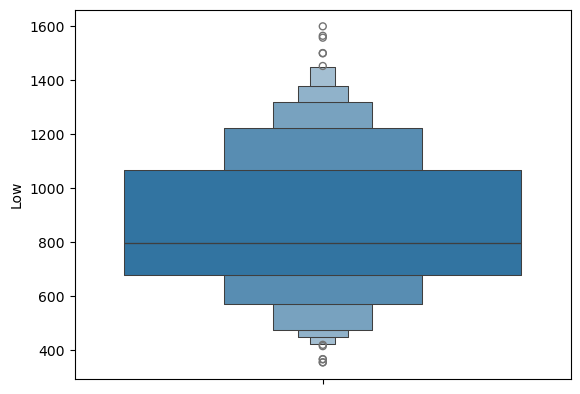

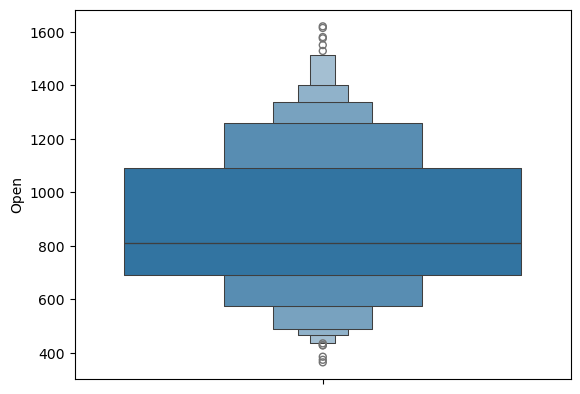

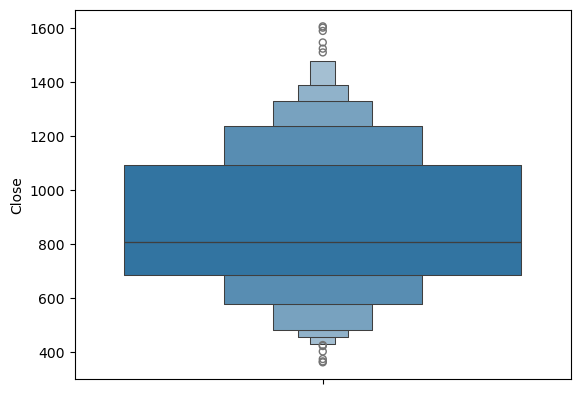

In [22]:
#Checking for any extreme outliers visually
sns.boxenplot(y=stockFile['Volume'])
plt.show()
sns.boxenplot(y=stockFile['High'])
plt.show()
sns.boxenplot(y=stockFile['Low'])
plt.show()
sns.boxenplot(y=stockFile['Open'])
plt.show()
sns.boxenplot(y=stockFile['Close'])
plt.show()

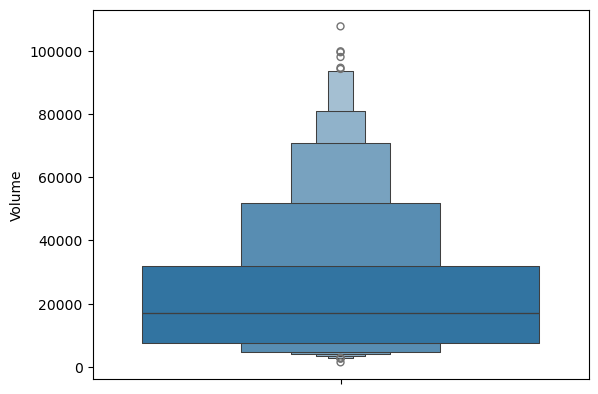

In [23]:
#Removing extreme outliers from volume using IQR approach
Q1 = stockFile['Volume'].quantile(0.25)
Q3 = stockFile['Volume'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
stockFile['Volume']=np.where((stockFile['Volume']<lower_bound) | (stockFile['Volume']>upper_bound), stockFile['Volume'].median(), stockFile['Volume'])
sns.boxenplot(y=stockFile['Volume'])
plt.show()

In [24]:
#Creating csv file for the cleaned data
stockFile.to_csv('Clean_Stock_File.csv')

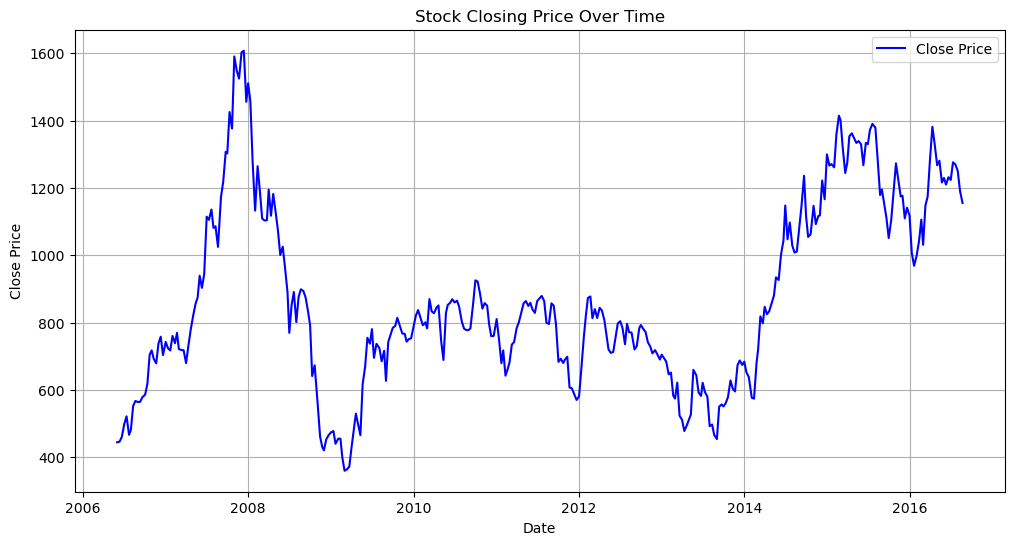

In [25]:
#Visualizing the cleaned data
plt.figure(figsize=(12, 6))
plt.plot(stockFile['Date'], stockFile['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

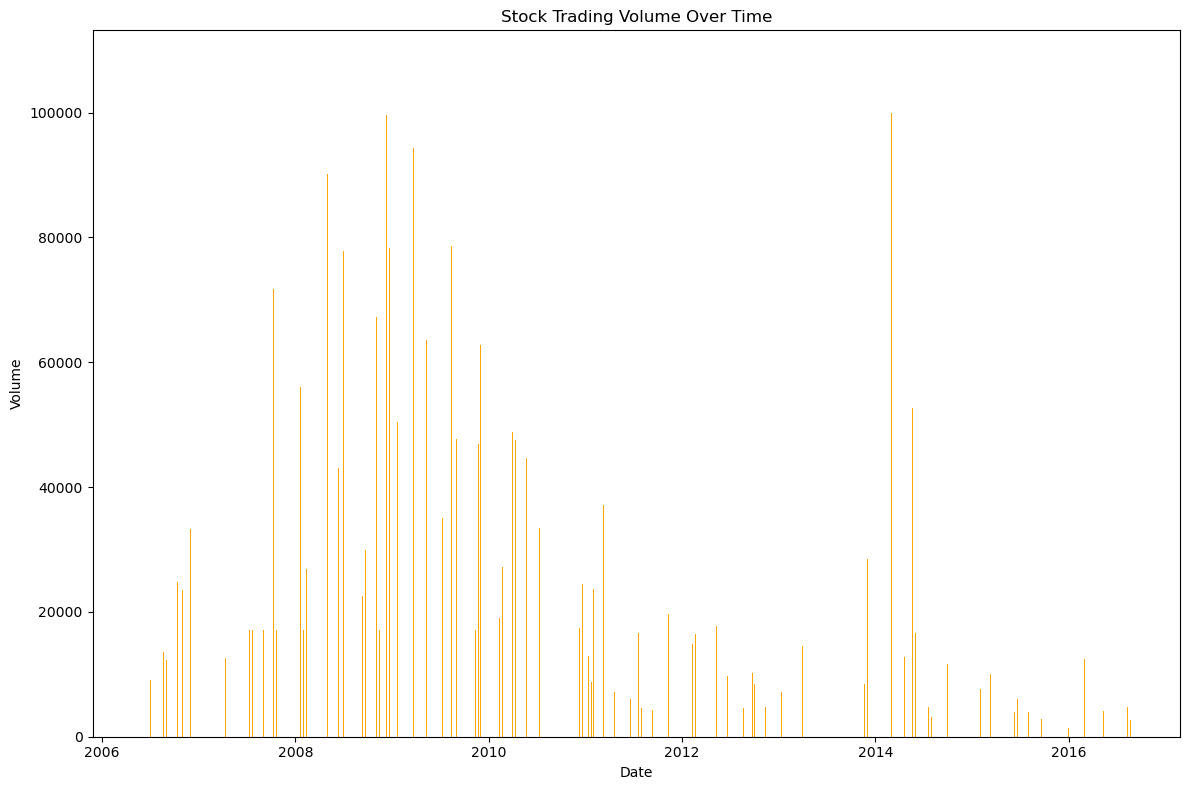

In [26]:
plt.figure(figsize=(12, 8))
plt.bar(stockFile['Date'], stockFile['Volume'], color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Stock Trading Volume Over Time')
plt.tight_layout()
plt.show()

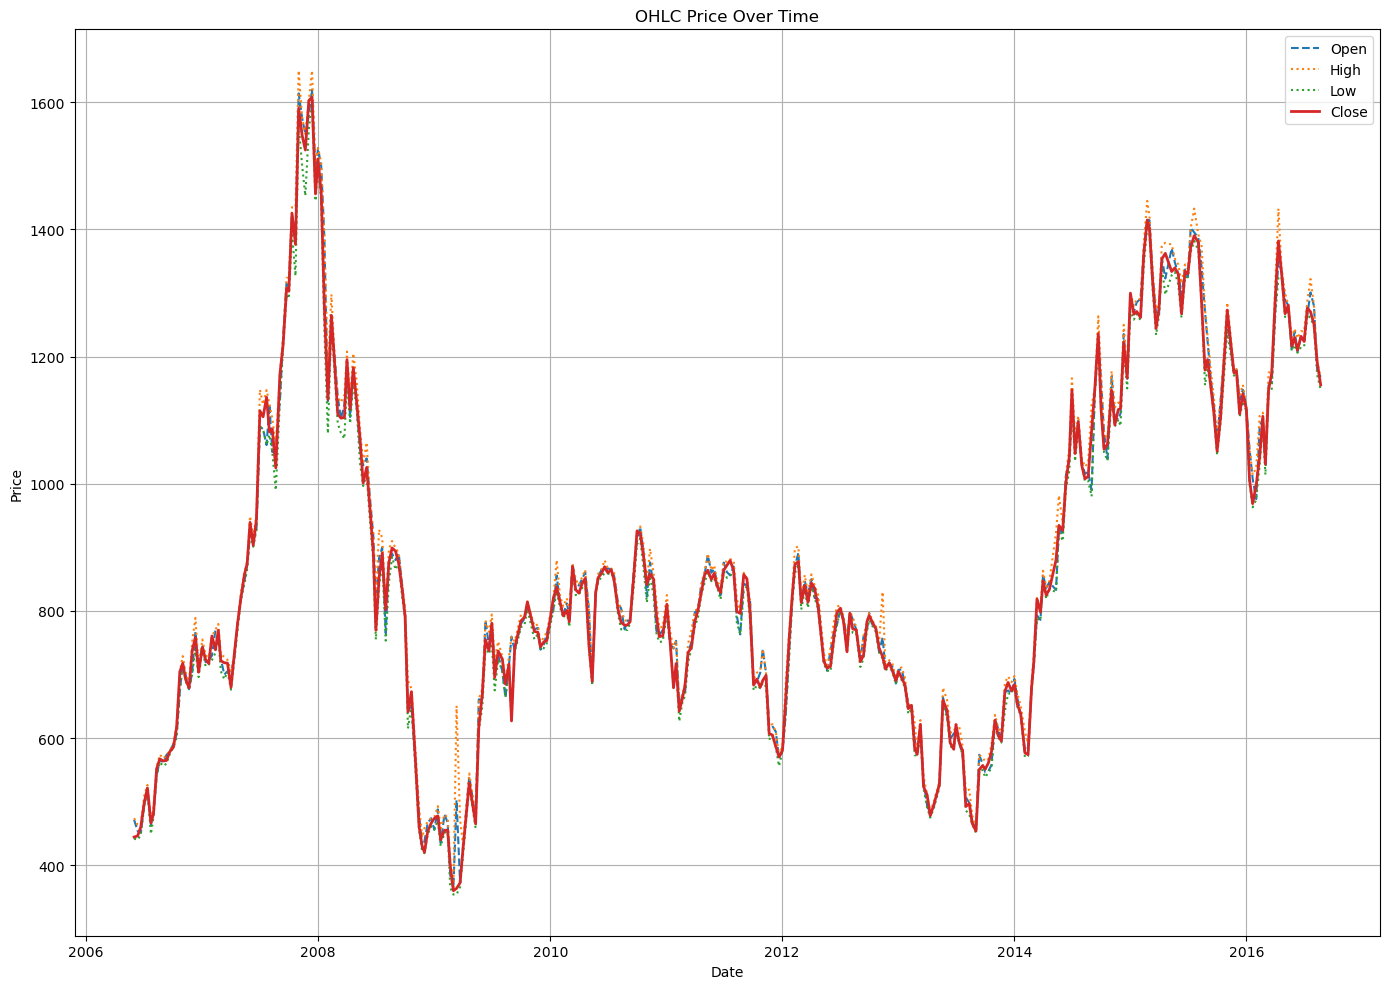

In [27]:
plt.figure(figsize=(14, 10))
plt.plot(stockFile['Date'], stockFile['Open'], label='Open', linestyle='--')
plt.plot(stockFile['Date'], stockFile['High'], label='High', linestyle=':')
plt.plot(stockFile['Date'], stockFile['Low'], label='Low', linestyle=':')
plt.plot(stockFile['Date'], stockFile['Close'], label='Close', linewidth=2)
plt.title('OHLC Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

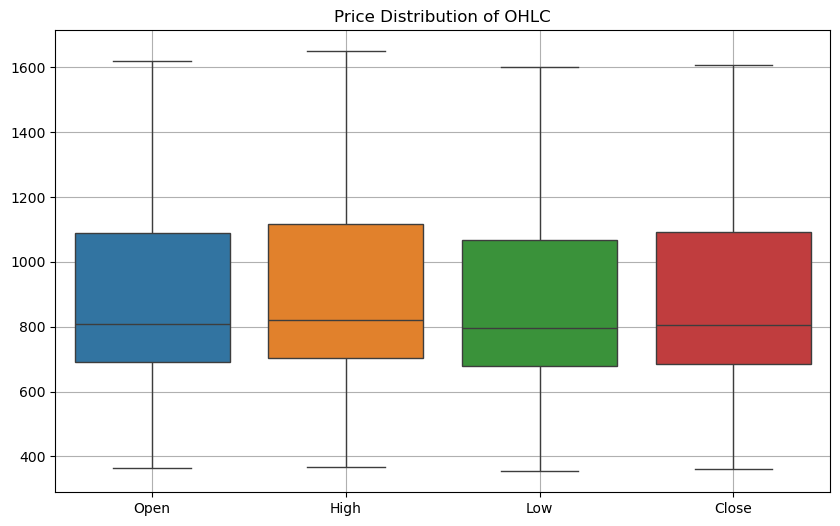

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=stockFile[['Open', 'High', 'Low', 'Close']])
plt.title("Price Distribution of OHLC")
plt.grid(True)
plt.show()

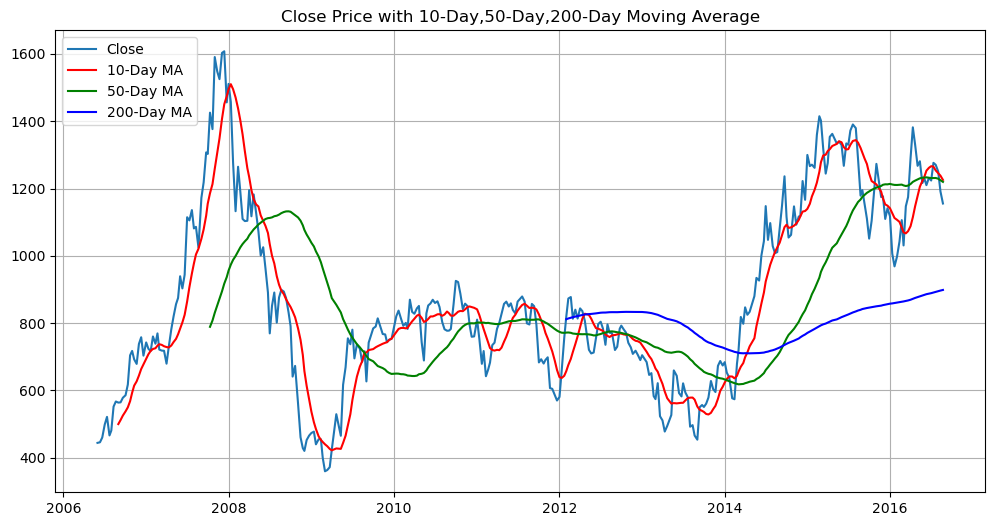

In [30]:
stockFile['MA_10'] = stockFile['Close'].rolling(window=10).mean()
stockFile['MA_50'] = stockFile['Close'].rolling(window=50).mean()
stockFile['MA_200'] = stockFile['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(stockFile['Date'], stockFile['Close'], label='Close')
plt.plot(stockFile['Date'], stockFile['MA_10'], label='10-Day MA', color='red')
plt.plot(stockFile['Date'], stockFile['MA_50'], label='50-Day MA', color='green')
plt.plot(stockFile['Date'], stockFile['MA_200'], label='200-Day MA', color='blue')
plt.title("Close Price with 10-Day,50-Day,200-Day Moving Average")
plt.legend()
plt.grid(True)
plt.show()